# Результат ревью:

Я отмечаю адекватный уровень твоей программистской подготовки. Ты используешь продвинутые концепции языка Python, библиотеки pandas и одной из основных библиотек машинного обучения sckit-learn. Это показывает твой уровень владения инструментами анализа данных и machine learning.

С комментированием никаких проблем нет. Твоих объяснений достаточно для понимания твоими коллегами хода мыслей. Ссылки из брифа проекта в нужных местах также помогают следовать за развитием событий и дают полную информацию касаемо того, что будет происходить в том или ином разделе проекта.

Мне было просто проверять твой проект, потому что он чётко структурирован, с использованием оглавления. 

Зелёным цветом я отметил и прокомментировал удачные и элегантные решения, на которые ты можешь опираться в будущих проектах.

Жёлтым цветом я выделил то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас.

Красных комментариев, которые бы не позволяли мне принять твой проект в его нынешнем состоянии - нет. 

ПРОЕКТ ПРИНЯТ!

Подводя итог: отличная работа, молодец! Желаю тебе успехов в учёбе, желаю, чтобы проекты сдавались или сразу, или после первой итерации! Удачи!

Если же после факта принятия проекта у тебя возникнут дополнительные вопросы – я никуда не пропал. Мой адрес эл/почты: anepomnjashiy@gmail.com, имя в Пачке: anepomnjashiy, имя в Телеграмме: https://t.me/aleks_nep

p.s. я тебе на твой адрес эл/почты сейчас вышлю некоторые материалы из своей электронной библиотеки - надеюсь они будут тебе полезными в учёбе.</div>

Приветствую коллега! 

Меня зовут Александр Непомнящий и я буду проверять твой проект. Предлагаю общаться на «ты» :))) Но, если это не удобно - мы вполне можем перейти на вы".

Вкратце обо мне: я работаю в сфере информационных технологий, аналитика (анализ) данных - это и мой рабочий функционал и личная, интересная мне область для саморазвития. Используемый стек: python, pandas, графические библиотеки matplotlib/seaborn/plotly. Сфера применения: маркетинговая аналитика в медицинской клинике (Клиника «Кивач», www.kivach.ru, республика Карелия). Если вдруг есть вопрос – что делает аналитик в коммерческой медицине – то вот короткий ответ. Самый главный вопрос, на который мы хотим получить ответ (и который в дальнейшем приведёт к перераспределению рекламного бюджета, плюс напрямую повлияет на разработку и предложению рынку новых лечебных программ) - это КТО ОН, НАШ КЛИЕНТ? Фактически это задача (на нашем внутреннем языке формулируется как построение и анализ «ПОРТРЕТА КЛИЕНТА»). Визуализируем и пытаемся придать смысл половозрастным данным наших клиентов, кто из какого региона и в какие времена года к нам приезжает. Учитываем количество приездов. Учитываем на какую программу этот конкретный клиент приехал в первый раз и как в дальнейшем меняются его предпочтения. Пытаемся построить модель оттока и спрогнозировать, когда клиент уйдёт в отток. Смотрим цифры (суммы трат клиентов на отдельных группах медицинских программ). Анализируем медицинские услуги, которые входят в путёвку, а также что, в каких количествах и на какую сумму клиент покупает дополнительно. Очень вкратце как-то так.

Теперь к сути: основная цель моей проверки - пройти по шагам, по логике твоего решения и обсудить те моменты, которые можно изменить, улучшить, довести до идеала. Такой формат работы двух программистов (аналитиков) ты или уже встречал(а), или встретишь на своей новой работе. Кто-то такой процесс называет "код-ревью", ну а как по мне, так это обмен опытом двух коллег, когда каждый из нас становиться лучше в процессе дискуссии.

Свои мысли, советы, комментарии и вопросы я буду оставлять в текстовых ячейках (markdown) ПОД твоим кодом. 
Для твоего удобства все эти заметки будут "цветными", как на примерах ниже:

"Зелеными" комментариями я буду отмечать твой элегантный ("красивый") код и/или удачные решения, на которые ты можешь смело опираться в будущих проектах.
<div class="alert alert-success">
<b>Отлично! 👍</b>

Отличная находка, элегантный код ...</div>

"Жёлтые" комментарии - это мои размышления, предложения, что-то, что на следующей итерации можно сделать по-другому. Твоя реакция на "жёлтые" комментарий необходима и подразумевает или правки, или реакцию или аргументированное согласие/не согласие. Я искренне верю, что наш двусторонний диалог под "желтым" комментарием - это то, от чего твой проект только выиграет. <div class="alert alert-warning">
<b>Комментарий 👉</b>

Здесь я бы предложил использовать .... Мои аргументы в пользу этого ...</div>

"Красные" комментарий будут появляться, когда что-то пойдёт не так: например, код будет выдавать ошибку. Или, когда в проекте не будет ответов на основные вопросы, ради которых весь анализ и выполнялся. "Красные" комментарии необходимо будет исправить, прежде чем я смогу принять проект.
<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

В этой ячейке код работает не так как задумано ...</div>

Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Это поможет мне оперативно выполнить повторную проверку твоего проекта.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом, лучше всего в новой ячейке, сразу под моим комментарием. Если для своих комментариев ты будешь использовать какой-то заметный цвет, то мне будет легче отследить твои изменения, например так:
<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Текст твоего комментария ...</font>
</div>

**Распространенные типичные недочёты в проектах студентов:**

<div class="alert alert-danger" ❌>
Неработоспособный код. Проверь проект на работоспособность перед отправкой на проверку. Это важный навык, который тебе пригодится как на собеседовании, при выполнении тестового задания, так и перед совещанием у руководства компании.</div>
<div class="alert alert-danger" ❌>
Проект не структурирован. В проекте должна быть структура, т.е. названия разделов и подразделов должны быть записаны в ячейках Markdown.</div>
<div class="alert alert-warning" 👉 >
Отсутствие описания, целей проекта, его задач, выводов. В описании должны быть озвучены поставленные задачи, содержание датасета, промежуточные и финальные выводы. Как правило, заказчик читает только финальный вывод, поэтому важно добавить информацию о проведенном исследовании, применить форматирование текста, в общем, сделать красиво, чтобы было понятно, что проведено настоящее исследование и выводу можно верить.</div>  
<div class="alert alert-warning" 👉 >
"Длинный код". Код и и комментарии, которые прячутся за правым концом ячейки нужно переносить на новую строку. Твои будущие коллеги не оценят необходимость постоянного скроллинга. Согласно PEP8: https://www.python.org/dev/peps/pep-0008/ длина строки не должна превышать 79 символов.</div>
<div class="alert alert-warning" 👉 >
Твои коллеги ценят и твое и своё время, поэтому "подсвечивай" свои комментарии в ячейках Markdown. Подробнее про синтаксис Markdown, с примерами, можно почитать здесь: https://paulradzkov.com/2014/markdown_cheatsheet/?
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Удаление-излишних-данных" data-toc-modified-id="Удаление-излишних-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Удаление излишних данных</a></span></li><li><span><a href="#Кодирование" data-toc-modified-id="Кодирование-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Кодирование</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Инициализация-моделей" data-toc-modified-id="Инициализация-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Инициализация моделей</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Промежуточный-Вывод" data-toc-modified-id="Промежуточный-Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Промежуточный Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Промежуточный-Вывод" data-toc-modified-id="Промежуточный-Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Промежуточный Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
!pip install c

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import f1_score,roc_auc_score,roc_curve

     |████████████████████████████████| 71 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 765 kB 8.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.2 MB 960 kB/s eta 0:00:011
     |████████████████████████████████| 37.2 MB 807 kB/s eta 0:00:011
    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python3.9 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-4uory5qg/matplotlib_0e14b01472e04758990c07c830ade651/setup.py'"'"'; __file__='"'"'/tmp/pip-install-4uory5qg/matplotlib_0e14b01472e04758990c07c830ade651/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-bnfl7ly0
         cwd: /tmp/pip-install-4uory5qg/matplotlib_0e14b01472e04758990c07c830

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично. Импортировали требуемые для анализа библиотеки и загрузили данные. Сейчас посмотрим на их состояние и если всё ОК, сможем приступать к построению моделей....
</div>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Да, верно, info() показывает, что лишь в одном столбце данных нашего датафрейма есть пропуски. Ну что же, всего один столбец с пропусками лучше, чем целый пул ... задача чуть упрощается. Пишу "упрощается" потому, что при кажущейся простоте задачи - обработка пропусков таит в себе массу вопросов как технического плана, так и организационного момента, бизнес-аспекта и даже вопросы этического плана (ниже будет моё эссе на эту тему - где я попытался раскрыть сложность вопроса).
</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Я бы рекомендовал тебе не "совмещать" в рамках одной ячейки строки с кодом, логически не связанные. Да, конечно никто не запрещает в одной ячейки разместить (**как пример**): импорт библиотек, чтение данных и сохранение их в датафрейм, info(), describe(), код приведения столбцов к нижнему регистру, код поиска дубликатов и код удаления записей и ещё какой-либо код, НО ..., во-первых, это трудно читать, во-вторых это трудно отлаживать (представь себе, как вставить между командами твоими какой-то промежуточный output в отдельной ячейке?).

В общем рекомендация: одна ячейка - один логически связанный фрагмент кода.</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Разделил.</font>
</div>

В представленном датафрейме 10000 записей.  
Столбцы Geography, Gender имеют категориальный тип данных, которые необходимо преобразовать в численный  
Пропуски, имеются только в столбце Tenure (9-10% от общего числа)

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Спасибо за точный и конкретный вывод по предварительному анализу загруженных данных. Зачастую коллеги ограничиваются исключительно кодом, без слов. Ввиду чего непонятно к каким выводам они пришли и что собираются делать дальше.

Ты важные моменты озвучиваешь в этом выводе, молодец. Я прокомментирую их по месту возникновения кода (или в финальном выводе по празделу подготовки (предобработки) данных.</div>

### Поиск дубликатов

Удалим явные дубликаты

In [5]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Проверим неявные дубликаты в столбцах 'CustomerId','Surname'

In [6]:
display(data[data.duplicated(subset=['CustomerId','Surname'], keep=False) == True])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


**Дубликаты не обнаружены**

### Обработка пропусков

Пропуски имеются только в Tenure. Так как число пропусков составляет 9-10% от общего количества записей и среди заполненных значений нет больших выбивающихся значений, заполнить пропуски логично медианными значениями.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично, молодец! Именно в этом проекте заполнение пропусков медианой - верное решение. Над другим способом, например заполнением чем-либо (очевидно по нескольким столбцам!?) пришлось бы серъёзно поразмыслить. В общем твой вариант обработки пропусков я считаю верным. 
    
Ну и как вариант, для расширения кругозора, какие варианты заполнения пропусков **я встречал в этом проекте у коллег** и почему они неверны:

1. Я не подтверждаю корректность заполнения пропусков в **Tenure - случайными** числами. Это как? Из каких соображений? Мы занимаемся наукой о данных (data science), а не случайными предсказаниями. 
  
2. я не подтверждаю корректность заполнения пропусков в **Tenure** фиксированной отрицательной "заглушкой". Во-первых, почему таким значением? Во-вторых, когда модель будет "проверять" новых, неизвестных ей заемщиков (чтобы предсказать "отток / не отток") - в этих новых строках будут отрицательные значения? Думаю нет, не будут, скорее там будут пропуски (судя по тем данным на которых мы сейчас будем модель строить).
  
3. я не подтверждаю корректность заполнения пропусков в **Tenure** фиксированной "заглушкой" (часто 0 выбирают). Я задаю вопрос: а почему скажем не 1 ... или 2 или 3? Ведь по смыслу данных, когда количество клиентов "Бета"-банка немного уменьшается с каждым последующим годом" (проверяется легко, запуском value_counts()) эти "заглушки" также походят по смыслу;

4. я не подтверждаю корректность заполнения пропусков в **Tenure** методами ffill / bfill. Смотри, подобный метод заполнения имеет право на существование, но мне кажется не в нашем случае. Скорее я использовал бы этот вариант для заполнения пропущенных значений в данных, когда значения (в данных) имеют временную или пространственную зависимость. Например, если данные представляют собой временной ряд (например ежедневный рост курса валют) или если данные связаны с географическими координатами. В таких случаях методы ffill и bfill могут быть более эффективными, чем заполнение пропущенных значений медианой или средним.
    
И ЕЩЁ СОВЕТ (применим, когда заполняем пропуски медианой, как в нашем случае): смотрим на статистики данных ДО заполнения и ПОСЛЕ заполнения, подтверждая таким образом, что наш метод заполнения не изменил распределение (статистики) в заполненном столбце.    
</div>

In [7]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

<div class="alert alert-warning">
<b>Комментарий 👉</b>

По результатам проверки примерно 2,8 тысяч проектов за крайние 12 месяцев у меня родилось небольшое эссе на тему "удаления vs. спасения" данных, как раз на основе тех ситуаций и вопросов, которые мне коллеги задавали, которые мы обсуждали, уточняли и исправляли ... 

Желание уменьшить количество пропусков в данных (если такое желание конечно возникает ... но в рабочих проектах, "в жизни" оно как правило возникает) - можно только приветствовать. Приветствовать по 3-м минимум причинам:

1. это тренировка
    
2. это попытка сохранить данные ("данных много не бывает")
    
3. самое главное на мой взгляд - развитие аналитического мышления, желания "проникать" в секреты, которые скрывают данные. Когда вначале рождается гипотеза, потом эта гипотеза проверяется на данных (может ли такое быть? подтверждается?) и в финале уже гипотеза облекается в код.

Однако заполнение пропусков в данных не такая простая задача, как кажется ... простого ответа на вопросы: заполнять? удалить? чем заполнять? подходящего под все сценарии, нет ни в одной умной книжке ...

Самый идеальный случай - когда у тебя под рукой есть эксперт в предметной области. Если такой есть - советуйся с ним. Как правило это человек из бизнеса, который знает суть бизнес-процесса и вот именно он даст тебе точный и аргументированный совет - что в данной, конкретной задаче делать с "битыми" полями в строках датафрейма. Ты скажешь ему какой процент пропусков в данных, а он тебе ответит что делать: можно/нельзя удалить и/или даст рекомендации по заполнению. Вообще, как правило такой человек "на любой работе" есть. Для примера, финансовый директор думаю всегда даст рекомендации по финансовым данным, прочие профильные спецы - по своей сфере компетенций. Наверное только в зарождающемся стартапе может не быть каких-то компетенций, но тут уже можно и через фриланс (и т.п.) попробовать найти спеца и просить совета.

Теперь, что делать, если такого человека нет. Я бы ответил так: **ПОПЫТАТЬСЯ** вникнуть в бизнес-проблему самому. Наверное это сложно, если предметная область ну совсем незнакома. Но в общем случае, если бизнес совсем незнаком, то заполнение пропусков в данных наверное, не получиться. В таком случае попробуй ориентироваться на такое правило: если записи с пропусками в ключевых для твоего анализа столбцах составляют 1-3-5-ну может до 10% строк, то попробуй эти записи из оригинального датафрейма вырезать (но сохрани бы в некий df, к которому ты при необходимости можешь всегда обратиться).

В жизни, МНЕ КАЖЕТСЯ, как правило по всему датафрейму заполнять медианой/средним - ну вообще не вариант. Почему? Я бы ответил так - потому, что реальные датафреймы имеют миллионы строк и горизонт в несколько (десятков) лет, и если в 90-2000-е года всё было как-то более -менее стабильно/прогнозируемо, то в нынешней реальности события раскручиваются гораздо быстрее и не прогнозируемо. Пример: ты аналитик в автобизнесе. У тебя есть данные с пропусками в цене для машин в 2005-2007 года. Можно заполнить их средними основываясь на данных 2020-2021?

Может быть и такой вариант, что без заполнения некоторых столбцов некоторые записи по сути **НЕ** имеют смысла, но если их (записи с пропусками удалить), то и данных-то не останется. Ну тогда я бы такой совет дал - всё же заполнять медианой (она к скачкам выбросов более устойчива), но не по всему глобальному датафрейму, а выбрать простые группы (например, группы по интервалу лет - чтобы сгладить турбулентность нынешних лет) или выбрать более сложные группы (например, группы по интервалу лет и одновременно марке автопроизводителя (это я про вымышленный пример с автобизнесом)).

Теперь предположим, что мы выбрали какую-то стратегию заполнения "пропусков", не суть какую (оставить NaN или заполнить "заглушкой"). И в том и в другом случае придётся помнить этот выбор. Ты спросишь почему? Отвечу - потому, что инструменты, применяемые тобой в Питон/Пандас в каких-то случаях могут спокойно пропускать твой выбор, а в каких-то случаях тебе придется этот твой выбор обрабатывать.

Пример 1: мы заполнили пропуски "заглушкой". В этом случае: 1. расчет корреляций значение "заглушку" будет "ловить" (надо отфильтровать!), 2. расчет гипотез также будет "сбивать" правильный вывод (надо отфильтровать!) 3. графики, которые ты будешь строить - будут "заглушку" отображать на осях (нужно фильтровать), 4. в группировках также по-видимому "заглушку" надо будет убирать.

Пример 2: мы оставили пропуски как NaN. В этом случае: 1. метод .corr NaN'ы пропускает (отфильтровать не надо), 2. в расчет гипотез всё равно пропуски отфильтровать 3. графики, которые ты будешь строить могут отображать, а могут не отображать, 4. в группировках NaN'ы по sum() видны не будут, а по count() будут.

Ну и напоследок совсем уже жёсткий пример: додумывать "от себя", бездумно проставлять в пропуски медианные/средние значения - это НЕ верно. Давай же опять "про жизнь". Я писал выше, что в медицине работаю, да? Предположим мне принесли данные из онкологического диспансера. Задача: построить модель, которая по некоторым маркерным анализам будет прогнозировать наличие онкологии. **По-простому, ответить, что стоит за строчкой в данных: жизнь или смерть.** Уууууух … аж мороз по коже продирает, правда? 

Итак, 1.000.000 записей и 70 столбцов. Данные за 25 лет. 70 столбцов - это поля, с результатами конкретных и очень специфичных анализов. В "начале" данных, 15-20 лет назад, есть пропуски (много), но и в принципе, в данных есть пропуски. Как думаешь - имею я моральное право перед людьми, которые фактически доверяют мне в виде данных свою жизнь огульно подойти к заполнению пропусков?
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Да, конечно в твоей сфере нет права на ошибку. Изначально хотел вырезать часть данных с пропущенным целевым признаком так как пропуски составляют всего 9-10% от общего количества данных</font>
</div>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Удаление излишних данных

Столбцы RowNumber,CustomerId,Surname  не несут полезной информации для построния модели и прогнозирования, удалим их 

In [9]:
data = data.drop(["RowNumber","CustomerId","Surname"], axis = 1)

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Здесь отлично. Обоснование почему эти столбцы в данных являются неинформативными, а соответственно и бесполезными для наших моделей машинного обучения ты верно приводишь. Всё так, эти столбцы можно "безболезненно" из нашего датафрейма удалить. Действительно, ведь **RowNumber** - дублирует индекс строки, начинает счет с единицы, **CustomerId** - уникальный идентификатор клиента, он не дает дополнительной полезной информации, **Surname** - фамилия - тоже идентификатор для определенного человека, но может повторятся, так как фамилии не уникальны, тоже бесполезен для исследования.
</div>

### Кодирование 

Для признака Gender применим прямое кодирование

In [10]:
data['Gender'] = pd.get_dummies(data['Gender'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  uint8  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(1), uint8(1)
memory usage: 791.1+ KB


<div class="alert alert-warning">
<b>Комментарий 👉</b>

Сейчас в теории тренажера вам предлагается использовать get_dummies(), однако это приведёт к сложностям в будущих спринтах. Поэтому здесь я бы рекомендовал тебе использовать класс OneHotEncoder из sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).
        
Get_dummies подходит больше для анализа данных, а для машинного обучения более предпочтителен OneHotEncoding, т.к. он позволяет избежать ряд ошибок при обучении моделей, в том числе может работать с неизвестными ранее уровнями категорий, которых не было изначально (например, если появится еще одна страна, скажем Italy). Get_dummies с неизвестными категориями "из коробки" не работает, но есть лайфхак описанный здесь: https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/ (*Though get_dummies can’t handle unknown categories natively, you could get around this inconsistency by applying the below technique. You will have to save the columns of the train set and load it during prediction on test set. Then you need to apply reindex and after filling the missing values will get you the same features as the train set*)
        
Пандасовский Get_dummies не имеет методов fit и transform, поэтому кодируем категории на полном датафрейме (ДО разбиения на выборки ... так мы кстати обходим и проблему "неизвестных/новых категорий"), затем "режем" данные на выборки.

НАСТОЯТЕЛЬНАЯ РЕКОМЕНДАЦИЯ в будущих проектах: используем OneHotEncoder из sklearn! Вот статья на тему: https://datagy.io/sklearn-one-hot-encode/

p.s. (ещё один внешний источник ... статья: https://moluch.ru/archive/395/87491/): *Самая большая ошибка, которую совершает большинство людей, заключается в том, что они не различают порядковые и номинальные переменные. Поэтому, если мы используем ту же функцию map() или LabelEncoder с номинальными переменными, модель будет думать, что между номинальными значениями существует какая-то связь, например, в нашей таблице есть 3 города: Москва, Санкт-Петербург, Киев, закодируем города через LabelEncoder(), допустим новые значения: 1, 2, 3 соответственно. В этом случае данный метод сильно упрощает данные, фактически проецируя категориальный признак на вещественную прямую. Весь смысл категориальности теряется. Более того, появляются ложные интерпретации, исходя из кодировки Москва + Санкт-Петербург = Киев, но это не характеризует наши данные, а скорее отображает особенности выбранной нами кодировки, что может запутать в последствии модель. Существует метод, который способен решить эту проблему - это one-hot-encoding*.

В ИТОГЕ: в проектах машинного обучения часто рекомендуется использовать OneHotEncoder() вместо get_dummies() для кодирования категориальных переменных. Вот несколько причин, почему это предпочтительнее:

1. Обработка новых данных: OneHotEncoder() позволяет обрабатывать новые данные, которые могут содержать категории, не встречающиеся в обучающем наборе. При использовании get_dummies() набор категорий фиксирован на основе уникальных значений в исходном наборе данных. Если в новых данных появится категория, которая отсутствует в обучающем наборе, get_dummies() создаст столбец из нулей для этой категории, что может привести к проблемам при работе с моделью. OneHotEncoder(), напротив, сохраняет информацию о всех уникальных категориях и может преобразовывать новые данные соответствующим образом.

2. Разреженное представление: Когда у вас есть большое количество категорий или набор данных с большим объемом, создание фиктивных переменных с использованием get_dummies() может привести к разреженной матрице с большим количеством нулевых значений. OneHotEncoder() имеет параметр sparse, который по умолчанию установлен в True и создает разреженное представление, которое эффективно использует память и ускоряет вычисления в некоторых моделях.

3. Интеграция с пайплайном: Если вы используете пайплайны для последовательного выполнения преобразований данных и обучения модели, OneHotEncoder() более удобен, поскольку он может быть легко интегрирован в пайплайн с помощью Pipeline или ColumnTransformer. С get_dummies() интеграция в пайплайн может быть сложнее.

4. Гибкость: OneHotEncoder() предлагает больше гибкости в настройке кодирования категорий. Вы можете указать, какие столбцы должны быть закодированы, а также использовать различные параметры, такие как handle_unknown для обработки неизвестных категорий и drop для определения удаления первого столбца каждого кодирования.

Тем не менее, в некоторых случаях get_dummies() может быть полезным, особенно если у вас есть маленький набор категорий или вы хотите полное контроль над именами столбцов. Однако в большинстве проектов машинного обучения OneHotEncoder() предпочтительнее из-за своей гибкости и способности обрабатывать новые данные.
</div>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Молодец, что сейчас ты не забываешь про dummy-ловушку.
</div>

In [11]:
display(data['Geography'].value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

#Для признака Geography необходимо применить порядковое кодирование

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

Почему порядковое? Есть такие отношения между странами? Франция больше/важнее Германии, например?
</div>

In [12]:
#encoder = OrdinalEncoder()
#data["Geography"] = encoder.fit_transform(data[["Geography"]])
#display(data.head(10))
#data.info()

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

При обучении моделей машинного обучения очень важно соблюдать правило неиспользования информации из тестового набора в процессе обучения модели. Это называется "принципом честности по отношению к данным" (data fairness principle) или "правилом изоляции тестового набора" (holdout rule).

Когда мы применяем кодирование целевой переменной, мы используем информацию о целевой переменной для создания новых признаков на основе категориальных переменных. Если мы включим информацию из тестового набора (например, при вычислении среднего значения целевой переменной), мы нарушим правило честности по отношению к данным.

Обучение энкодера на тренировочном наборе позволяет использовать информацию только из него (для создания закодированных признаков). Это важно для создания модели, которая будет обобщать и хорошо работать на новых, ранее не встречавшихся данных. При использовании всего набора данных для обучения мы нарушаем разделение между тренировочным и тестовым наборами, что может привести к переобучению и недостаточной обобщающей способности модели.

---
Итак, кодировать данные (используя OneHotEncoder (а также OrdinalEncoder и LabelEncoder)) следует ПОСЛЕ разбиения данных на выборки. Если кодирование (и/или масштабирование) выполняются до разбиения данных на выборки, то информация из тестовой выборки может просочиться в обучающую выборку. Это может привести к переобучению модели и неверным результатам.

p.s. Дальше - на примере OneHotEncoder. Нет, конечно OneHotEncoder можно применять и до разбиения на выборки. Однако, если ты собираешься применять OHЕ до разбиения на выборки, то нужно обязательно использовать только те значения (строки), которые был представлены в обучающей выборке (а это усложнит код - нужно отбирать соответствующие строки используя индексы). Если же использовать значения из всего набора данных, то повторюсь - это может привести к переобучению моделей (ввиду утечки данных).
    
Итак, для кодирования данных в выборках с помощью OneHotEncoder из scikit-learn нужно выполнить следующие шаги:

1. Импортировать класс OneHotEncoder из модуля sklearn.preprocessing.

2. Создать объект OneHotEncoder с нужными параметрами, например, sparse=False, если хотим получить "плотный" массив вместо разреженной матрицы. Не забыть про drop='first' (возможно!).
    
3. Вызвать метод fit на объекте OneHotEncoder, передав ему обучающую выборку с категориальными признаками. Это позволит ему определить уникальные значения для каждого признака и создать соответствующие бинарные столбцы.
    
4. Вызвать метод transform на объекте OneHotEncoder, передав ему тестовую выборку с категориальными признаками. Это позволит ему преобразовать категориальные значения в бинарные столбцы, используя те же коды, что и для обучающей выборки.
    
5. Объединить полученный массив с остальными числовыми признаками, например используя функцию numpy.concatenate или метод pandas.DataFrame.join.    
    
Почему нельзя кодировать сразу и тестовую и обучающую выборки? Потому что это может привести к утечке данных. Если мы кодируем сразу и тестовую и обучающую выборки, то таким образом в кодирование включается информация о категориях, которые не встречаются в обучающей выборке, но есть в тестовой. Это может дать модели преимущество при предсказании на тестовых данных, которое не отражает ее реальную способность обобщать на новых данных. Чтобы избежать этого, мы должны кодировать данные только на основе обучающей выборки и применять тот же энкодер к тестовой выборке.

p.s. и ещё, мне коллеги-студенты одной из когорт прислали то, как их преподаватель объясняет этот момент (возможно будет полезно): **Вообще в предобработке для машинного обучения нужно соблюдать такой порядок: Сначала разбиваем на обучающую и тестовую (ещё валидационную, если кросс-валидацию не используем) выборки, а потом уже пропуски заменяем, колируем, масштабируем. При этом энкодеры и скейлеры обучаем только на трейне. Для теста и валидационной выборки применяем transform только без fit.**

---
**И ещё: главный принцип: из теста данные не должны в трейн попадать. Тестовая выборка симулирует данные получаемые моделью во время работы. Поэтому нужно все манипуляции проводить после разбиения на выборки. Второй аспект: т.к. тестовая выборка симулирует работу модели в реальных условиях, когда у нас по сути выборки нет и мы должны для любой отдельной новой записи делать предсказание, то заполнение пропусков, масштабирование, кодирование делаем на основе данных из обучающей выборки: т.е. энкодеры, скейлеры импутеры обучаем на трейне, а на тесте применяем tranform."**

А теперь небольшое продолжение, но уже применительно к OrdinalEncoder(). На самом деле всё тоже самое, но тем не менее ....

Кодирование категориальных признаков следует делать после разделения данных на выборки. Это связано с тем, что кодирование может вносить информацию из обучающей выборки в тестовую выборку, что приводит к переобучению и неправильной оценке модели. Например, если мы используем OrdinalEncoder() с параметром categories=‘auto’, то он будет определять уникальные значения категориальных признаков на основе всего набора данных. Это значит, что мы будем использовать информацию из тестовой выборки для кодирования обучающей выборки, что нарушает принцип независимости данных.

Чтобы избежать этой проблемы, мы должны сначала разделить данные на обучающую и тестовую выборки, а затем применять OrdinalEncoder() к каждой выборке отдельно. При этом мы должны использовать метод fit_transform() для обучающей выборки и метод transform() для тестовой выборки, например:

    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.model_selection import train_test_split

    # разделяем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # создаем объект OrdinalEncoder
    encoder = OrdinalEncoder()

    # применяем OrdinalEncoder к обучающей выборке
    X_train_encoded = encoder.fit_transform(X_train)
    
    # применяем OrdinalEncoder к тестовой выборке
    X_test_encoded = encoder.transform(X_test)
</div>


<div class="alert alert-warning">
<b>Комментарий 👉</b>

Давай посмотрим как выглядит утечка данных при неправильном кодировании категориальных переменных: предположим, у нас есть набор данных с признаком "Город" (категориальная переменная) и целевым признаком "Цена" (непрерывная переменная). Мы разделили данные на тренировочный и тестовый наборы.

Примерный код (на всем наборе данных) может выглядеть следующим образом:

    *Импортируем необходимые библиотеки*
    import pandas as pd

    *Загружаем данные*
    data = pd.read_csv("data.csv")

    *Вычисляем среднее значение целевого признака для каждой категории*
    mean_encoding = data.groupby("Город")["Цена"].mean()

    *Применяем средние значения на всем наборе данных*
    data["Город_encoded"] = data["Город"].map(mean_encoding)

В этом примере мы вычисляем среднее значение цены для каждой категории города на всем наборе данных и затем применяем эти средние значения к городу в каждой строке. Таким образом, весь набор данных, включая тренировочный и тестовый наборы, используется для создания закодированных признаков.

Проблема с таким подходом заключается в том, что информация из тестового набора данных влияет на создание закодированных признаков. Это может привести к искажению результатов и нечестной оценке производительности модели.

В итоге, при применении модели на новых данных (тестовом наборе), она может показать высокую производительность, но на практике её производительность может быть намного хуже из-за утечки информации из тестового набора в процессе обучения.

Правильным подходом является обучение TargetEncoder() только на тренировочном наборе данных и применение полученных закодированных признаков на тестовом наборе, чтобы избежать утечки информации и получить честную оценку производительности модели.
</div>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Данные загружены, отлично.

Хорошо, что применяешь метод .head()/.sample() таким образом в память не будет загружен весь датасет, объем которого может быть огромным.

Методы .info, .describe, .value_counts(), .unique() как правило часто встречаются и обязательны к применению в задачах по исследованию данных, ведь с их помощью можно получить первые инсайты. 

Итак, мы провели предварительный анализ данных, проверили данные на наличие пропусков и затем обработали их (аргументированно заполнили / удалили / оставили как есть). Теперь можно приступать собственно к анализу данных и ответам на вопросы проекта.</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Несколько моментов "на будущее" (сейчас забегаю чуть вперед, но будущем это будет важно) которые я хотел озвучить перед переходом к собственно исследованию (некоторые из этих моментов ты в своем проекте реализовал):
    
- имеет смысл критично посмотреть на данные с точки зрения наличия пропусков в признаках (вопрос: все ли ml-модели "любят" пропуски?) и обработать или удалить их
    
- имеет смысл явно обозначить какую задачу мы будем решать: с учителем / без учителя, классификации / регрессии ...
    
- в моделях бинарной классификации (если бы это был бы наш случай!) имеет смысл смотреть на баланс классов. Два взгляда (с разных сторон) на эту проблему тут: https://alexanderdyakonov.wordpress.com/2021/05/27/imbalance/ и https://habr.com/ru/post/349078/
    
- имеет смысл смотреть на корреляцию признаков. При высокой их степени коррелированности возникает проблема  мультиколлиниарность признаков. Проблема "мультиколлинеарности" это и про переобучение модели и про её интерпретируемость и про сложность модели (содержание в модели избыточного количества переменных). В чем негативный эффект сложной модели? Вот в чем: усложняется интерпретация параметров, оценки параметров ненадежны – получаются большие стандартные ошибки, которые меняются с изменением объема наблюдений, что делает модель регрессии непригодной для прогнозирования.

Вот несколько причин, почему проблема мультиколлинеарности (МК) важна:

1. Неоднозначность коэффициентов: МК делает оценку коэффициентов модели неустойчивой. Когда существует сильная корреляция между признаками, модель становится неспособной разделить влияние каждого признака на целевую переменную. Это может привести к неоднозначным и неправильным оценкам коэффициентов, что затрудняет интерпретацию важности каждого признака. Согласись - это важно, чтобы результат, который выдает модель можно было бы понять и объяснить с точки зрения предметной области. В случае включения в модель высокоскоррелированных признаков - может случиться так, что коэффициенты (да, проблема присуща моделям линейным ... регрессия среди них!) могут менять знаки и попытка объяснения предметной области с помощью этих коэффициентов будет противоречить здравому смыслу.

2. Плохая обобщающая способность: МК может снизить способность модели обобщаться на новые данные. Когда сильно коррелированные признаки присутствуют в модели, модель может стать "перегенерированной" и склонной к переобучению на обучающих данных. В результате модель может показывать хорошую производительность на обучающих данных, но плохо обобщаться на новые данные.

3. Ухудшение точности и устойчивости модели: МК может привести к численным проблемам при решении линейных уравнений, используемых для оценки коэффициентов модели. Это может привести к нестабильности и неточности оценок. Кроме того, небольшие изменения в данных могут привести к большим изменениям в оценках коэффициентов модели, что делает модель неустойчивой.

4. Избыточность информации: Когда признаки сильно коррелированы, они предоставляют практически одинаковую информацию о целевой переменной. Такая избыточность может привести к неэффективности модели и увеличению сложности модели без значительного улучшения производительности.

В целом, МК может иметь отрицательное влияние на производительность, стабильность, интерпретируемость и обобщающую способность.
    
---
Для деревянных моделей и моделей градиентного бустинга проблема МК  не является такой критической, как для линейных моделей. Вот несколько причин:

1. Нелинейность: Деревянные модели и модели градиентного бустинга являются нелинейными моделями. Они способны обрабатывать сложные взаимодействия между признаками и целевой переменной. В отличие от линейных моделей, они могут более гибко адаптироваться к наличию мультиколлинеарности в данных.

2. Рекурсивное разбиение: Деревья принятия решений в деревянных моделях и моделях градиентного бустинга используют рекурсивное разбиение для разделения данных на более чистые группы. Это означает, что деревья могут независимо выбирать разные признаки для разделения, даже если они сильно коррелированы. Таким образом, деревья могут игнорировать мультиколлинеарность и использовать другие признаки для принятия решений.

3. Ансамбль деревьев: Модели градиентного бустинга строятся на основе ансамбля слабых деревьев решений. Каждое дерево добавляется постепенно для уменьшения ошибки предыдущих деревьев. Это позволяет модели градиентного бустинга восстанавливать ошибки, вызванные мультиколлинеарностью, поэтапно улучшая прогнозы.

Хотя мультиколлинеарность не является проблемой в деревянных моделях и моделях градиентного бустинга в той же степени, что и в линейных моделях, она все еще может оказывать влияние на производительность и интерпретируемость модели. Сильно коррелированные признаки могут вносить избыточность в модель и увеличивать сложность, не принося значительного улучшения в прогнозах. Поэтому, хотя деревья могут быть более устойчивыми к мультиколлинеарности, все же рекомендуется выполнять анализ корреляции признаков и, при необходимости, применять методы снижения размерности или регуляризации для улучшения модели.
    
Вот классная статья. Простым языком, на примере показана проблема. А также, что важно - разобраны варианты как её (проблему) победить. Статья: https://habr.com/ru/company/akbarsdigital/blog/592493/ 
</div>


## Исследование задачи

### Разделение данных на выборки

In [13]:
target = data['Exited']
features = data.drop('Exited', axis=1)


Разобьем выборку на три части обучающую, валидационную и тестовую, в отношении 3:1:1

In [14]:
features_train_base, features_test, target_train_base, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_base, target_train_base, test_size=0.25, random_state=12345)


Выполним кодирование категориального признака с помощью category_encoders

In [15]:
#encoder = OneHotEncoder( drop = 'first',handle_unknown='error', sparse=False)

#encoder_features_train = pd.DataFrame(encoder.fit_transform(features_train[["Geography"]]))
#features_train_encoded = features_train.join (encoder_features_train)
#features_train_encoded.drop("Geography", axis= 1 , inplace= True )
#features_train_encoded.rename(columns = {0:'Country_1', 1:'Country_2', 2:'Country_3'}, inplace = True )

#encoder_features_valid = pd.DataFrame(encoder.transform(features_valid[["Geography"]]))
#features_valid_encoded = features_valid.join (encoder_features_valid)
#features_valid_encoded.drop("Geography", axis= 1 , inplace= True )
#features_valid_encoded.rename(columns = {0:'Country_1', 1:'Country_2', 2:'Country_3'}, inplace = True )

#encoder_features_test = pd.DataFrame(encoder.transform(features_test[["Geography"]]))
#features_test_encoded = features_test.join (encoder_features_test)
#features_test_encoded.drop("Geography", axis= 1 , inplace= True )
#features_test_encoded.rename(columns = {0:'Country_1', 1:'Country_2', 2:'Country_3'}, inplace = True )


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Пробовал выше кодировать с помощью OneHotEncoder, но почему то вылезали NaN в данных, так не понял почему, использовал ниже другую библиотеку</font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Неплохо бы на ошибку взглянуть.
</div>

In [16]:
ohe_encoder = ce.OneHotEncoder(cols = ['Geography'])

features_train = ohe_encoder.fit_transform(features_train)
features_train.drop("Geography_1", axis= 1 , inplace= True )
features_test = ohe_encoder.transform(features_test)
features_test.drop("Geography_1", axis= 1 , inplace= True )
features_valid = ohe_encoder.transform(features_valid)
features_valid.drop("Geography_1", axis= 1 , inplace= True )

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

1. Здесь хорошо, происходит фиксация random_state. Воспроизводимость результатов разбиения выборки на обучающую (тренировочную) / тестовую / валидационную мы обеспечили, значит при всех последующих запусках нашего кода подвыборки будут идентичными.
    
2. Доли размеров train/test/valid 3:1:1 - хорошо.


</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Присмотрись к параметру stratify у функции train_test_split. Использование stratify позволит сохранить баланс меток классов 1/0 ("уйдет"/"не уйдет") во всех выборках (этот момент важен **особенно** в случае сильного дисбаланса классов в данных). Но конечно stratify это "не про" решение проблемы с "выравниванием" количества строк (с определенным классом) именно в данных.
</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Я бы рекомендовал после разбиения данных на выборки посмотреть на их размеры и размерности. Метод shape для этого - идеальный помощник. "Цифры" по выборкам покажут верно ли мы произвели "разделение" данных.

p.s. так (**псевдокод**): X_train.shape[0] – «покажет» количество строк в тренировочной выборке, а X_train.shape[1] - количество столбцов в ней же. Ну а X_train.shape – выведет размерность train'а в виде кортежа с 2мя значениями (первое число – количество строк, второе – столбцов).</div>

In [18]:
display(features_train.shape)
display(features_valid.shape)
display(features_test.shape)

(6000, 11)

(2000, 11)

(2000, 11)

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Исключительно как вариант, а также воспользоваться советом со Стэковерфлоу: https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test/38251213#38251213

	train, valid, test = np.split(df.sample(frac=1, random_state=821), [int(.6*len(df)), int(.8*len(df))])

Также, разбивать данные можно и автоматизировано, используя библиотеку fast_ml (см. скрин). К этому скрину один комментарий – не факт, что эта библиотека fast_ml развернута здесь, на Хабе, НО дома, своей локальной машине, с установленной средой (например Анакондой: https://www.anaconda.com/products/distribution) ты вполне можешь этим вариантом пользоваться (после установки **!pip install fast_ml**):
</div>

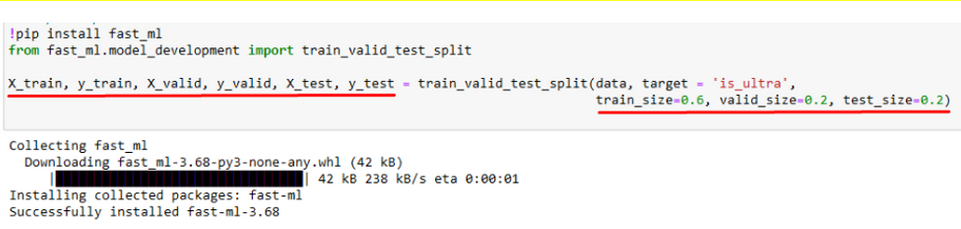

### Масштабирование признаков

Все небинарные признаки необходимо масштабировать с помошью стандартизации данных.

In [19]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()

features_train[numeric] = scaler.fit_transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric]) 
pd.options.mode.chained_assignment = None

display(features_train.head(20))


,CreditScore,Geography_2,Geography_3,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
492,-0.134048,0,0,0,-0.078068,-0.369113,0.076163,2,0,1,0.331571
6655,-1.010798,0,0,1,0.494555,-0.007415,0.136391,1,1,1,-0.727858
4287,0.639554,1,0,1,1.353490,-1.454209,0.358435,1,1,1,-0.477006
42,-0.990168,0,0,0,2.116987,-1.092511,0.651725,1,1,1,-0.100232
8178,0.567351,0,0,0,0.685430,0.715982,0.813110,2,1,1,0.801922
2127,0.598296,1,0,1,-0.459816,1.439380,0.921963,2,1,0,0.820416
2051,0.618925,0,0,0,-0.173505,-1.454209,0.482629,2,0,0,1.208574
6712,-0.546636,0,0,0,0.399118,-0.369113,-1.232442,1,1,0,1.225280
4994,1.485360,1,0,0,1.258053,-0.007415,1.450438,1,1,1,-0.645530
9523,0.082561,0,0,0,-0.650691,-1.815908,0.607589,1,1,0,-0.266350


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Здесь всё верно. Масштабирование "обучается" на тренировочной выборке, а затем РЕЗУЛЬТАТ (обычно это scaler) последовательно применяется и к тренировочной и к валидационной и к тестовой выборкам.

Для чего нужно масштабировать признаки перед подачей в линейную модель машинного обучения (например в линейную регрессию)? Нам нужно минимизировать функцию потерь методом градиентного спуска. В случае разных масштабов признаков (например, год рождения и количество детей) её линии уровня будут иметь вид вытянутых эллипсов. Тогда вектор антиградиента и направление от текущей точки к минимуму функции потерь могут не совпадать, мы можем уйти далеко и не в ту сторону, и, в зависимости от шага градиентного спуска, либо придётся сделать больше итераций, либо вообще не будет сходимости. Если же признаки отмасштабированы, то линии уровня похожи на окружности. И проблема несовпадения антиградиента и направления к минимуму не так выражена.

p.s. Для "деревянных моделей" (я вижу ниже, что ты их используешь) масштабирование данных не обязательно, так как они не зависят от расстояния между объектами или величины признаков (суть работы "деревянных моделей" - разбиение пространства признаков на области, в которых принимается одно решение).</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Последовательность команд (это **псевдокод**): 
    
    1. scaler = StandardScaler()
    2. scaler.fit(X_train) 
    3. X_train_st = scaler.transform(X_train) 
    
можно было записать так:
    
     1. scaler = StandardScaler()
     2. X_train_st = scaler.fit_transform(X_train)

p.s. но это **только** для тренировочной выборки!    
</div>


<div class="alert alert-warning">
<b>Комментарий 👉</b>

Отлично, 5 шагов (EDA, обработка аномалий и пропусков, разделение данных на выборки, масштабирование/нормировку и кодирование признаков), входящие в типичный пайплайн подготовки данных **к этому моменту должны быть выполнены** ...

Я тебе совет дам: создай шаблон кода (или функцию/функции), которые будут работать с момента загрузки данных и до получения выборок, готовых к передаче в модели МО.
    
Зачем такой шаблон нужен? Чтобы не ломать всякий раз голову, не вспоминать и писать руками один и тот же код (да ещё и с возможностью совершить "глупую" ошибку). В шаблоне должны быть (как минимум) следующие рутинные процедуры, которые встречаются ну абсолютно в каждом МО-проекте:
    
1. разбиение данных на выборки,

2. масштабирование/нормировка.    

3. обработка категорий,
    
Затем ты этот шаблон будешь вставлять в каждый новый проект, чуть модифицировать его (имена переменных, названия столбцов) и гарантированно получать работающий и безошибочный код.
    
А ресурсы головы ))) лучше тратить на подбор гиперпараметров и генерацию новых фичей - вот здесь находится то, что способно выделить твои модели, поднять их качество.    
</div>

### Инициализация моделей

Рассмотрим 3 модели обучения: 
* DecisionTreeClassifier 
* RandomForestClassifier 
* LogisticRegression

Выполним подбор гиперпараметров для каждой модели

#### DecisionTreeClassifier

In [20]:
def DTC(X1,Y1,X2,Y2,cw=None): #X=features, Y=target, cw=class_weight(введен для борьбы с дисбалансом путем взвешивания классов)
    best_model = None
    best_params_f1 = []
    best_f1 = 0
    for max_depth in range(2,10):
        for min_samples_split in range(2,6):
            for min_samples_leaf in range(1,10):
                for criterion in ['gini', 'entropy']:                
                    model_dtc_clf = DecisionTreeClassifier(random_state=12345,
                                                             max_depth=max_depth,
                                                             min_samples_split=min_samples_split,
                                                             min_samples_leaf=min_samples_leaf,
                                                             criterion=criterion)           
                    model_dtc_clf.fit(X1,Y1) #X1=features_train, Y1=target_train
                    predictions = model_dtc_clf.predict(X2) #X2=features_valid
                    f1 = f1_score(Y2,predictions) #Y2=target_valid
                    if f1 > best_f1:
                        best_params_f1 = [max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_f1 = f1
    print('''Лучшая метрика f1: {}
    Гиперараметры для лучшей модели DecisionTreeClassifier:
    max_depth = {}
    min_samples_split = {}
    min_samples_leaf = {}
    criterion = {} \n'''.format(round(best_f1, 3),
                                 best_params_f1[0],
                                 best_params_f1[1],
                                 best_params_f1[2],
                                 best_params_f1[3]
                                ))

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично! Красивая функция. Ну и здорово что ты понимаешь, что применение функций упрощает код, делает его структурированным, простым для понимания и упрощает его дальнейшее переиспользование (принцип DRY (Don’t Repeat Yourself / Не повторяйся) – в действии). Дополнительно о DRY можно почитать здесь: https://habr.com/ru/company/itelma/blog/546372</div>

In [21]:
DTC(features_train,target_train,features_valid,target_valid)

Лучшая метрика f1: 0.566
    Гиперараметры для лучшей модели DecisionTreeClassifier:
    max_depth = 9
    min_samples_split = 2
    min_samples_leaf = 8
    criterion = gini 



<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Итак, к этому моменту мы знаем следующие факты о наших данных:

1. данные несбалансированны (записей с классом == 0 в 4 раза больше чем даных с классом == 1) - вижу ниже.

2. согласно ТЗ Заказчика нам требуется выполнить условие, что f1-мера должна быть больше 0.59

3. из теории в Тренажере мы знаем, что метрика **accuracy_score НЕ ПОКАЗАТЕЛЬНА** для оценки моделей (в задаче классификации) построенных на данных с дисбалансом классов.

Ну и здесь ты молодец, что считаешь что-то из набора (полнота / точность / f1-мера / roc-auc).  
    
p.s. можно ещё матрицу ошибок (confusion matrix) построить.
</div>

#### RandomForestClassifier

In [22]:
def RFC(X1,Y1,X2,Y2,cw=None): #X=features, Y=target, cw=class_weight(введен для борьбы с дисбалансом путем взвешивания классов)
    best_model = None
    best_params_f1 = []
    best_f1 = 0
    for n_estimators in range(30,40):
        for max_depth in range(10,17,2):
            for min_samples_split in range(2,5):
                 for min_samples_leaf in range(1,4):
                        model_rf = RandomForestClassifier(random_state=123,
                                                          n_estimators=n_estimators,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf)
                        model_rf.fit(X1,Y1) #X1=features_train, Y1=target_train                
                        predictions = model_rf.predict(X2) #X2=features_valid
                        f1 = f1_score(Y2, predictions) #Y2=target_valid
                        if f1 > best_f1:
                            best_params_f1 = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                            best_f1 = f1
    print('''Наилучшая метрика f1: {}
    Гиперараметры для лучшей модели RandomForestClassifier:
    n_estimators = {}
    max_depth = {}
    min_samples_split = {}
    min_samples_leaf = {} \n'''.format(round(best_f1, 3),
                                 best_params_f1[0],
                                 best_params_f1[1],
                                 best_params_f1[2],
                                 best_params_f1[3]
                                ))

In [23]:
RFC(features_train,target_train,features_valid,target_valid)

Наилучшая метрика f1: 0.576
    Гиперараметры для лучшей модели RandomForestClassifier:
    n_estimators = 38
    max_depth = 14
    min_samples_split = 2
    min_samples_leaf = 2 



#### LogisticRegression

In [24]:
def LR(X1,Y1,X2,Y2,cw=None): #X=features, Y=target, cw=class_weight(введен для борьбы с дисбалансом путем взвешивания классов)
    best_model = None
    best_params_f1 = []
    best_f1 = 0 
    for multi_class in ['auto', 'ovr', 'multinomial']:
        for max_iter in range(100, 200, 10):
            model_lr = LogisticRegression(random_state=12345, multi_class = multi_class, max_iter=max_iter)
            model_lr.fit(X1,Y1) #X1=features_train, Y1=target_train
            predictions = model_lr.predict(X2) #X2=features_valid
            f1 = f1_score(Y2,predictions) #Y2=target_valid
            if f1 > best_f1:
                    best_params_f1 = [multi_class, max_iter]
                    best_f1 = f1
    print('''Наилучшая метрика f1: {}
    Гиперараметры для лучшей модели LogisticRegression:
    multi_class = {}
    max_iter = {} \n'''.format(round(best_f1, 3),
                                     best_params_f1[0],
                                     best_params_f1[1]
                                            ))            

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>


OrdinalEncoder / LabelEncoder - это плохой выбор для кодирования категорий, между которыми нет порядковых отношений и/или отношений "меньше-больше", в случае использования данных **в линейных моделях**. Пример: после кодирования столбца 'Brand' у нас может получиться, что БМВ (0) меньше Форда (10). Линейные модели это "меньше / больше" легко обнаружат и конечно же будут использовать!
    
p.s. но OrdinalEncoder / LabelEncoder - это возможный выбор для кодирования категорий, между которыми нет порядковых отношений и/или отношений "меньше-больше" - **в случае использования "деревянных" моделей**.     
    
Вот ссылка (https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c) и цитата из неё: "When NOT to use Ordinal Encoder?

If the data you are working and trying to interpret has numerical significance, you will most likely not need to use ordinal encoder, or any encoder for that matter. If you can already take the mean, median, mode of your data that provides insight, you’re in luck and won’t need to encode the data.

**Ordinal encoder also should not be used if your data has no meaningful order. Going back to the car color example, there is no way to logically order these colors from smallest to largest or worst to best. When working with nominal data, OneHotEncoder or LabelEncoder should do the trick depending on what you need. OneHotEncoder is used with the features/variables, while LabelEncoder is used for the target variables**.

When to Use Ordinal Encoder?

**The name of the encoder gives it away, but ordinal encoders should be used when working with ordinal data. When working with any data related to ranking something with non-numerical categories, ordinal encoder is the way to go**." 
    
Выбери другой способ кодирования. 

p.s. (ещё один внешний источник): Самая большая ошибка, которую совершает большинство людей, заключается в том, что они не различают порядковые и номинальные переменные. Поэтому, если мы используем ту же функцию map() или LabelEncoder с номинальными переменными, модель будет думать, что между номинальными значениями существует какая-то связь, например, в нашей таблице есть 3 города: Москва, Санкт-Петербург, Киев, закодируем города через LabelEncoder(), допустим новые значения: 1, 2, 3 соответственно. В этом случае данный метод сильно упрощает данные, фактически проецируя категориальный признак на вещественную прямую. Весь смысл категориальности теряется. Более того, появляются ложные интерпретации, исходя из кодировки Москва + Санкт-Петербург = Киев, но это не характеризует наши данные, а скорее отображает особенности выбранной нами кодировки, что может запутать в последствии модель. Существует метод, который способен решить эту проблему - это one-hot-encoding.
</div>


<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Другой энкодер используется.
</div>

In [25]:
LR(features_train,target_train,features_valid,target_valid)

Наилучшая метрика f1: 0.301
    Гиперараметры для лучшей модели LogisticRegression:
    multi_class = auto
    max_iter = 100 



### Промежуточный Вывод

Подобраны лучшие гиперпараметры для исследуемых моделей  
**DecisionTreeClassifier:**
* criterion: gini 
* max_depth: 9, 
* min_samples_leaf: 8 
* min_samples_split: 2   

f1-мера при данных гиперпараметрах равна 0.566


**RandomForestClassifier:**

* n_estimators: 38
* max_depth: 14
* min_samples_split: 2
* min_samples_leaf: 2 
 
f1-мера при данных гиперпараметрах равна 0.576

**LogisticRegression**
* max_iter: 100 
* multi_class: auto 

f1-мера при данных гиперпараметрах равна 0.301

Лучшим образом на несбалансированных классах повела себя модель случайного леса с f1-мерой равной 0.576.

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Отрицательный результат (требуемое качество согласно ТЗ: f1 > 0.59 не достигнуто) - тоже результат.
    
Я не буду комментировать далее рутинные (и практически одинаковые, за исключением меняющихся названий моделей, действия). Если только ошибку увижу - тогда напишу. А так, смотрю за ходом исследования + возможно где-то свои мысли/советы/рекомендации укажу.    
</div>

## Борьба с дисбалансом

Проверим баланс целевого признака

In [26]:
display(data['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично, молодец что обращаешь внимание на баланс классов в данных. Если в value_counts добавить normalize=True, то увидишь %, а не количество наблюдений по каждому классу.
</div>

Распределение целевого признака приблизительно 4:1.  
Выполним балансировку классов тремя методами:
* Взвешивание классов
* Downsampling
* Upsampling  

Для каждого метода проверим измение F1-меры каждой модели с подбором лучших гиперпараметров.

### Взвешивание классов

<div class="alert alert-warning">
<b>Комментарий 👉</b>

(Рассуждения): отметь такой момент: совмещать up(down)sampling и class_weight нельзя.

Взвешивание работает таким образом, что даёт дополнительный вес значимости малопредставленным объектам, жертвуя точностью предсказывания многопредставленного класса в пользу точности предсказывания малопредставленного. Увеличение (уменьшение) выборки делает по сути то же самое (дублирование выборки дает больший вес дублируемому классу). Таким образом, использование сразу двух методов балансирование привело бы новому дисбалансу, поэтому использовать такие методы нужно взаимоисключающе.
</div>

In [27]:
DTC(features_train,target_train,features_valid,target_valid,cw='balanced')

Лучшая метрика f1: 0.566
    Гиперараметры для лучшей модели DecisionTreeClassifier:
    max_depth = 9
    min_samples_split = 2
    min_samples_leaf = 8
    criterion = gini 



In [28]:
RFC(features_train,target_train,features_valid,target_valid,cw='balanced')

Наилучшая метрика f1: 0.576
    Гиперараметры для лучшей модели RandomForestClassifier:
    n_estimators = 38
    max_depth = 14
    min_samples_split = 2
    min_samples_leaf = 2 



In [29]:
LR(features_train,target_train,features_valid,target_valid,cw='balanced')

Наилучшая метрика f1: 0.301
    Гиперараметры для лучшей модели LogisticRegression:
    multi_class = auto
    max_iter = 100 



### Downsampling

<div class="alert alert-warning">
<b>Комментарий 👉</b>

(Рассуждения): мне почему-то в принципе не нравиться "уменьшение" выборки. У меня такое ИМХО, что можно из-за неудачных значений **sample(frac=fraction)** удалить из превалирующего класса данные, которые будут "значимыми", и как результат потерять в "качестве". 
</div>


Коэффициент уменьшения выборки должен быть равен 0.25, чтобы соотношение классов было 1:1

In [30]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25)


Проверим результаты на моделях

In [31]:
DTC(features_train_downsampled,target_train_downsampled,features_valid,target_valid)

Лучшая метрика f1: 0.548
    Гиперараметры для лучшей модели DecisionTreeClassifier:
    max_depth = 7
    min_samples_split = 2
    min_samples_leaf = 2
    criterion = gini 



In [32]:
RFC(features_train_downsampled,target_train_downsampled,features_valid,target_valid)

Наилучшая метрика f1: 0.579
    Гиперараметры для лучшей модели RandomForestClassifier:
    n_estimators = 31
    max_depth = 10
    min_samples_split = 2
    min_samples_leaf = 2 



In [33]:
LR(features_train_downsampled,target_train_downsampled,features_valid,target_valid)

Наилучшая метрика f1: 0.474
    Гиперараметры для лучшей модели LogisticRegression:
    multi_class = auto
    max_iter = 100 



### Upsampling

<div class="alert alert-warning">
<b>Комментарий 👉</b>

(Размышления): отметь 2 таких момента: если бы использовали "копирование и размножение" выборки с классом == 1 (выравнивали классы), а после этого, следующим шагом использовали бы кросс-валидацию (на уже сэмплированных данных) то могли бы получить результат очень "оптимистичный", который на тестовых данных (если бы у нас была отложенная выборка) или на новых данных (которые модель ещё не видела), т.е results are overly optimistic and do not generalize to new data well. Ссылка на статью (с кодом): https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html 
    
И второе требование к "размножению" данных (повторюсь - это по моим наблюдениям за проектами этого типа ... ): upsampling мы должны делать **исключительно** на тренировочной выборке! На валидационной и/или тестовой выборки НЕ делаем!
</div>

Коэффициент увеличения выборки должен быть равен 4, чтобы соотношение классов было 1:1

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Очень частая ошибка в проектах (но в твоем случае всё верно, молодец) - коллеги в качестве коэффициента берут значение 10. То есть, они смотрят на дисбаланс классов, но при этом берут не то значение, которое позволит выборки "выровнять", а ещё больше разбалансирует их ... только в другую сторону.  

Ну и при даунсамплинге, часто вместо 0.25 используют значение 0.1
</div>

In [34]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)

Проверим результаты на моделях

In [35]:
DTC(features_train_upsampled,target_train_upsampled,features_valid,target_valid)

Лучшая метрика f1: 0.566
    Гиперараметры для лучшей модели DecisionTreeClassifier:
    max_depth = 6
    min_samples_split = 2
    min_samples_leaf = 8
    criterion = gini 



In [36]:
RFC(features_train_upsampled,target_train_upsampled,features_valid,target_valid)

Наилучшая метрика f1: 0.607
    Гиперараметры для лучшей модели RandomForestClassifier:
    n_estimators = 38
    max_depth = 16
    min_samples_split = 2
    min_samples_leaf = 2 



In [37]:
LR(features_train_upsampled,target_train_upsampled,features_valid,target_valid)

Наилучшая метрика f1: 0.477
    Гиперараметры для лучшей модели LogisticRegression:
    multi_class = auto
    max_iter = 100 



### Промежуточный Вывод

Лучшее влияние на увеличение f1-меры показала баллансировка классов с помошью апсемплинга. f1-мера на модели Случайного леса достигла значения 0.607, что больше требуемого 0.59 из условия задачи.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Здесь отлично: подобрали для всех наших моделей лучшие гиперпараметры (в данном случае - максимизирующие f1-меру и(?) AUC ("площадь"). Также здесь мы ещё и определили САМУЮ лучшую модель. На валидации ею оказалась модель "случайного леса". 

После того, как гиперпараметры на валидации подобраны - тестируем модели на тестовых данных. По результатам тестирования на тесте (сорри за тавталогию) выбираем модель, которую сможем передать в продакшн. 
</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Рекомендация: как ещё одна возможная альтернатива - использовать SMOTE (статьи: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html или https://habr.com/ru/articles/461285/) для увеличения выборки и RandomUnderSampler (статья: https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html) либо вместо (либо в дополнении) к функциям из тренажера.
</div>

## Тестирование модели

Протеститируем лучшую модель Случайного Леса с гиперпараметрами подобранными после баллансировки классов с помошью апсемплинга  

In [40]:
model_rf = RandomForestClassifier(random_state=123,n_estimators=38,max_depth=16,min_samples_split=2,min_samples_leaf=2)
model_rf.fit(features_train_upsampled,target_train_upsampled)
predictions_rf = model_rf.predict(features_test)

f1 = f1_score(target_test,predictions_rf)
roc_auc = roc_auc_score(target_test, predictions_rf)
              
print('f1_score: {}\nroc_auc_score: {}'.format(f1,roc_auc))              

f1_score: 0.6143024618991794
roc_auc_score: 0.7546618805933263


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Здесь отлично: проверили "качество" нашей лучшей модели на тестовых данных и поняли что можем запустить её в промышленную эксплуатацию!
</div>

Построим ROC-кривую на тестовой выборке

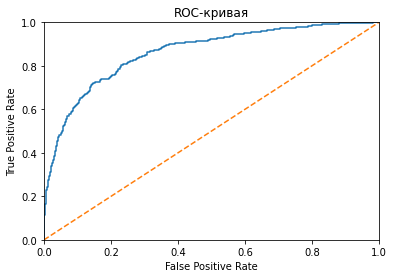

In [39]:
probabilities_test = model_rf.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds =  roc_curve(target_test, probabilities_one_test)

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Здесь хорошо. Расчёт ROC-AUC выполнен верно, через предсказанную вероятности класса 1. Здесь большой процент ошибок я часто вижу (коллеги делают расчет передавая вторым параметром не вероятность а признаки валидационной выборки). 
    
Площадь под ROC-кривой (Area Under Curve – площадь под кривой, Receiver Operating Characteristic – рабочая характеристика приёмника ... пришло из области радиоэлектроники) – это метрика оценки для задач бинарной классификации. ROC-кривая показывает зависимость между долей верно классифицированных объектов положительного класса и долей ложноположительных объектов. Ну и сама площадь под ROC-кривой является мерой качества классификатора: чем выше значение AUC (Area Under Curve), тем лучше качество классификации конкретной модели. Наш глаз и мозг устроены так, что мы очень хорошо видим геометрическую разницу (в данном случае площадей).
</div>

## Вывод

Цель проекта заключалась в прогнозировании оттока клиентов из «Бета-Банка». Для достижения этой цели была построена модель с максимально возможным значением F1-меры, не менее 0.59. Кроме того, измерялась также AUC-ROC для сравнения с F1-мерой.

Проект был разделен на несколько этапов:

**Подготовка данных:**   
Произведено преобразование категориальных признаков в численные, обработаны пропущенные значения в столбце Tenure, а также удалены ненужные столбцы.

**Исследование задачи:**   
Выборка была разделена на обучающую, валидационную и тестовую. Произведено масштабирование признаков и инициализация трех моделей: DecisionTreeClassifier, RandomForestClassifier и LogisticRegression. Для каждой модели были подобраны оптимальные гиперпараметры.

**Борьба с дисбалансом:**   
Был проведен анализ баланса целевого признака, который оказался недостаточно сбалансированным. Для решения этой проблемы были применены три метода балансировки классов: взвешивание классов, Downsampling и Upsampling. Лучшее улучшение метрики F1 показало применение Upsampling.

**Тестирование модели:**   
Лучшая модель, RandomForestClassifier с применением Upsampling, была протестирована на тестовой выборке. Также была построена ROC-кривая.

Итоговые результаты проекта показали, что достигнута метрика F1-меры равная 0.614, что превышает требуемое значение 0.59. Это означает, что модель хорошо справляется с задачей прогнозирования оттока клиентов. AUC-ROC также была измерена и может быть использована для оценки качества модели, особенно в задачах с сильно несбалансированными классами.

Таким образом, был разработан успешный прогнозный алгоритм для предсказания оттока клиентов, который может быть использован банком для принятия соответствующих мер по удержанию клиентов и повышению их лояльности.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Всё отлично, результат достигнут.
    
Один совет (также, на будущее): как попытаться улучшить полученный результат, с минимум усилий? Ответ: мы использовали train для обучения модели, а valid - для поиска лучших значений гиперпараметров. Лучшие параметры нашли. Так почему бы теперь наши модели с выбранными гиперпараметрами не обучить на *общей* (тренировочной + валидационной) выборке (pd.concat() можно использовать для объединения). Чем больше данных, тем *лучше* модели смогут обучиться (надо проверять!). И вот теперь эту дообученную модель мы уже финально проверим на тестовой выборке (test).

Но следует учесть вот какой момент: нужно быть аккуратным с подобным «улучшением», если мы кодируем или масштабируем наши выборки. Например, в следующем проекте мы обучаемся на train’е, а затем делаем transform на валидации и тесте. Если после этого объединить трейн и валид, то это будет не совсем верно.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*

# Результат ревью:

Я отмечаю адекватный уровень твоей программистской подготовки. Ты используешь продвинутые концепции языка Python, библиотеки pandas и одной из основных библиотек машинного обучения sckit-learn. Всё это в целом упрощает твой код и одновременно показывает твой уровень владения инструментами анализа данных и machine learning.

С комментированием никаких проблем нет. Твоих объяснений достаточно для понимания твоими коллегами хода мыслей. Ссылки из брифа проекта в нужных местах также помогают следовать за развитием событий и дают полную информацию касаемо того, что будет происходить в том или ином разделе проекта.

Мне было просто проверять твой проект, потому что он чётко структурирован, с использованием оглавления. 

Зелёным цветом я отметил и прокомментировал удачные и элегантные решения, на которые ты можешь опираться в будущих проектах.

Жёлтым цветом я выделил то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас.

Однако есть принципиальные моменты, которые не позволяют мне принять твой проект в его нынешнем состоянии:

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b> 

1. Почему порядковое? Есть такие отношения между странами? Франция больше/важнее Германии, например?

2. Кодировать данные (используя OneHotEncoder (а также OrdinalEncoder и LabelEncoder)) следует ПОСЛЕ разбиения данных на выборки. Если кодирование (и/или масштабирование) выполняются до разбиения данных на выборки, то информация из тестовой выборки может просочиться в обучающую выборку. Это может привести к переобучению модели и неверным результатам.

3. OrdinalEncoder / LabelEncoder - это плохой выбор для кодирования категорий, между которыми нет порядковых отношений и/или отношений "меньше-больше", в случае использования данных **в линейных моделях**. Пример: после кодирования столбца 'Brand' у нас может получиться, что БМВ (0) меньше Форда (10). Линейные модели это "меньше / больше" легко обнаружат и конечно же будут использовать!
</div>

Эти 3 момента требуют твоего внимания. Комментарии по ним помечены красным цветом. 

Подводя итог: хорошая работа на самом-то деле, молодец! Есть несколько моментов к исправлению, но уверен, что они не вызовут у тебя сложностей. После доработки обязательно проверь комментарии и выводы. Их нужно будет скорректировать. Жду доработанную версию проекта на повторное ревью.
